# Lab 2: Visualizing Data & Metrics

COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

This lab is due to Gradescope at **2:45p next Thursday (2/10)** (before lab). You may discuss concepts and strategies with others in the lab, but you must submit your own code. 

## Provided Files
* `Lab2.ipynb`: This file.
* `Lab2-Questions.txt`: File for open-ended question responses.
* `Iris.csv`: Iris dataset
* `heart_failure_clinical_records_dataset.csv`: Heart failure dataset
* `student-mat.csv`: Student math performance dataset


## Part 1. Visualizing Data
The first purpose of this lab is to practice visualizing data to find underlying patterns. This can indicate whether or not machine learning algorithms are likely to be successful modeling a dataset. This will also help you understand the dataset and rationalize your ML pipeline to others. 

The code in the cells below is already complete and demonstrates some useful ways to visualize multidimensional data. You should read through these cells, making sure that you understand what the code is doing and why. You should also answer all prompts marked **QUESTION** in the corresponding section of `Lab2-Questions.txt`

We demonstrated in class that shallow ML models can accurately predict the species of an Iris flower from measurements of its petals and sepals. We will return to this dataset for the first part of this lab as we try to understand why these models were so effective. 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import sklearn
import sklearn.decomposition

# Load Iris data
df = pd.read_csv("Iris.csv")
df.drop('Id', axis=1, inplace=True)
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


The Iris dataset, like many real world datasets, contains more than 3 features. This means that we cannot directly plot the examples on a 2D plot to see whether they cluster by species, so let's explore some ways around this problem.

One option is to plot individual features on a histogram colored by label. The following cell uses the Seaborn `histplot()` function to plot a histogram of the `PetalLengthCm` feature colored by `Species`

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

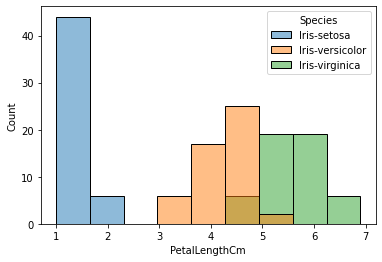

In [2]:
sns.histplot(data=df, x="PetalLengthCm", hue="Species")

`histplot` provides many optional arguments (https://seaborn.pydata.org/generated/seaborn.histplot.html). For example, we can change the histogram to use polygons with vertices in the center of each bin instead of bars

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

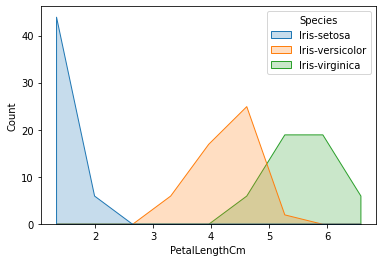

In [3]:
sns.histplot(data=df, x="PetalLengthCm", hue="Species", element='poly')

We've already learned something! This plot indicates that the `PetalLengthCm` feature provides a great deal of predictive power, especially for `Iris setosa` flowers. A ML model trained only on `PetalLengthCm` should be able to achieve high accuracy distingushing `Iris setosa` from the other two species. Additionally, the partial overlap between `Iris versicolor` and `Iris virginica` means that while `PetalLengthCm` provides some distinguishing information, more features will be needed to consistently distinguish these species.

Another useful visualization approach is to plot the relationship between two features. We can do this with the Seaborn `scatterplot()` function (https://seaborn.pydata.org/generated/seaborn.scatterplot.html):

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

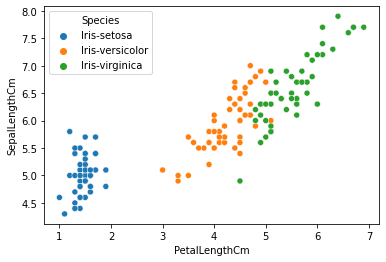

In [4]:
sns.scatterplot(data=df, x="PetalLengthCm", y="SepalLengthCm", hue="Species")

**QUESTION 1.1:** From this plot, how can we tell that the combination of `PetalLengthCm` and `SepalLengthCm` has more predictive power than either feature individually? 

Seaborn also provides the `jointplot()` function that lets us plot both individual and pairwise feature distributions in the same figure:

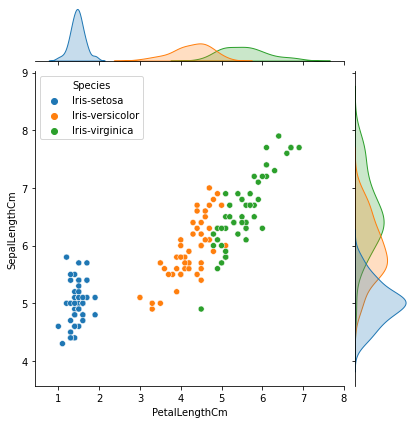

In [5]:
sns.jointplot(data=df, x="PetalLengthCm", y="SepalLengthCm", hue="Species")

This is all well and good, but there are more than 2 features in the Iris dataset. What if we want to visualize them all at the same time? One option is to create a square grid of 2D scatter plots, where each plot shows the relationship between 2 features. This is called a "pair plot", and once again Seaborn provides a function to create pair plots from a NumPy arrays or Pandas DataFrames (https://seaborn.pydata.org/generated/seaborn.pairplot.html)

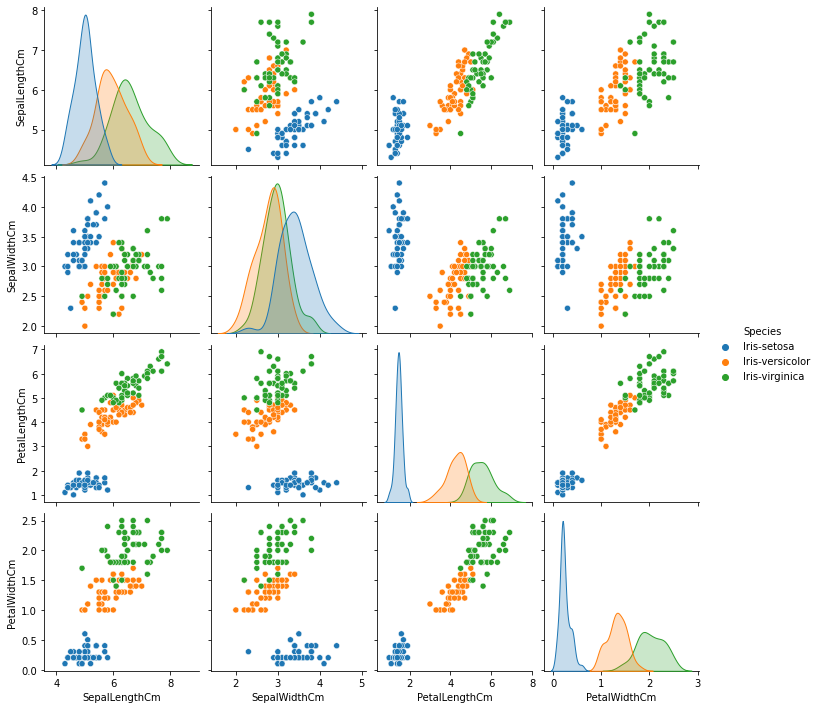

In [6]:
sns.pairplot(data=df, hue="Species")

`pairplot()` also provides many optional arguments. One of these allows you to use kernel density estimation to plot the scatter plot using a continuous probability density curve. This is useful if you have a large dataset with too many points to see clearly on an individual-point scatterplot

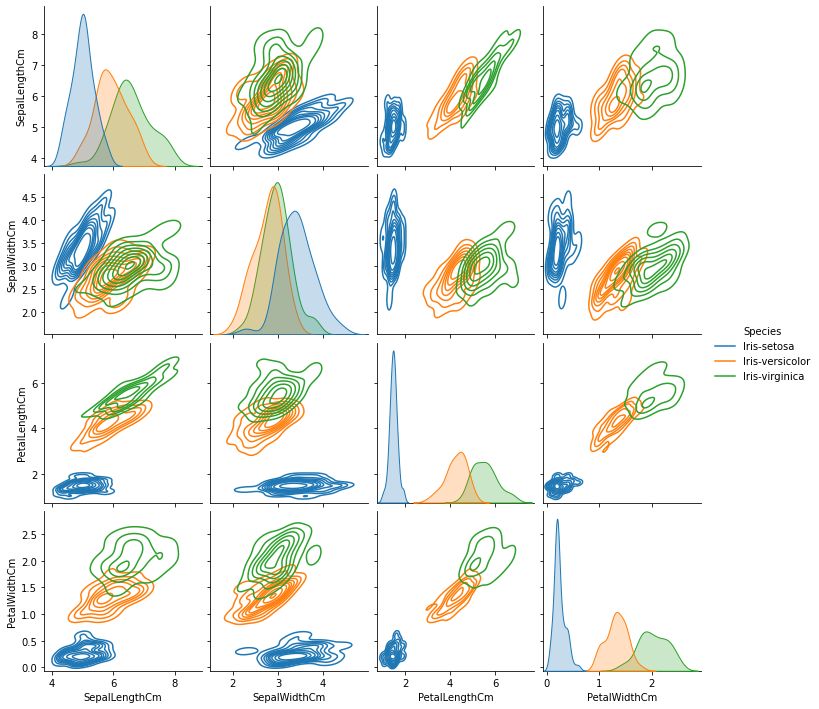

In [7]:
sns.pairplot(df, hue="Species", kind='kde')

**QUESTION 1.2:** From this plot, which feature do you think is most useful for the species prediction task? Which feature do you think is least useful? Why?

This is useful, but it still only shows pairwise replationships between features. An alternative approach is to project the examples onto 2 dimensions and plot them all in one go. When projecting a MxN matrix to a Mx2 matrix for N>2, you typically lose information. The trick is to perform a projection that preserves the information which is most relevant to your prediction task. We will talk about machine learning approaches to doing this in the second half of the semester. For the time being, we will use *principal component analysis*, a statistical technique that projects a matrix onto a lower dimensional space while preserving as much of the original data's variation as possible (for those familiar with linear algebra, this process involves singular value decomposition). We will use Scikit-Learn's PCA object to perform this transformation (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

<AxesSubplot:>

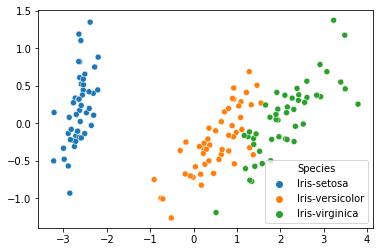

In [8]:
# Separate out the categorical labels column from the data
X = df.drop("Species", axis=1)
y = df["Species"]

# Initialize a PCA object and specify that we want the transformed data to be 2D
pca = sklearn.decomposition.PCA(n_components=2)

# Perform the PCA transformation
X_2D = pca.fit_transform(X)

# Plot a scatterplot of the result
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y)

Nice! This plot indicates that we should have good success training a classifier to predict Iris species, because the examples in our data seperate well in this 2D principal component space. Perfoming PCA on high-dimensional data followed by making a scatterplot of the result is a very common data exploration technique.

However, a **word of warning** is necessary. While good separation between classes post-PCA is a good indicator that ML modeling will be successful, poor separation does not necessarily mean that modeling will fail. As noted above, PCA is lossy, and ML algorithms (especially deep learning algorithms) are able to detect high-order and non-linear relationships between features that may get lost in a PCA projection. ML-based projections (especially autoencoders) are better at this, but we will get to those in time.

While the plots we have seen so far are useful for all varieties of datasets, there are many more visualization options, including those tailored to specific types of data. For example, the following cell creates a plot of FMRI signals for parietal vs. frontal brain lobes when the subject is presented with a stimulus version a control cue. The dark lines are the mean of many FMRI scans, and the translucent areas show the variation accross scans.

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

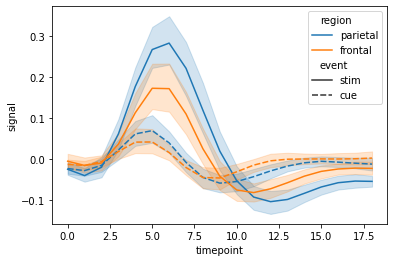

In [10]:
fmri = sns.load_dataset("fmri")
sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event") # The style argument tells lineplot() which column to use to separate examples using filled or dotted lines

**QUESTION 1.3:** With no additional knowledge about this data, do you expect that a shallow ML algorithm could be trained to predict whether someone is receiving this stimulus versus a control from FMRI scans with high accuracy? Why?

**QUESTION 1.4:** The Seaborn gallery has several examples of plots made using the library (https://seaborn.pydata.org/examples/index.html), including the FMRI plot above. Choose two other plots from this gallery and explain why you think they were a good (or bad!) choice of visualization for the underlying data. 

## Part 2. Visualizing Metrics
The second goal of this lab is to practice visualizing ML algorithm performance metrics, including ROC curves, precision/recall curves, and confusion matrices. These figures are often included in ML papers and will be key elements in your term project writeup and final presentation. 

As an example, we will use a new dataset of cardiovascular patient information to see whether we can predict death from heart failure for new patients. This dataset is available on Kaggle, description here: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data 

We will use several of the techniques we practiced in class to quickly train a decision tree classifier, a support vector machine classifer, and a 5-nearest neighbors classifier to make binary ``death`` or ``no death`` predictions from patient information

In [2]:
# import libraries
import sklearn.preprocessing
import sklearn.metrics
import sklearn.svm
import sklearn.tree
import sklearn.neighbors

# load dataset
X = pd.read_csv("heart_failure_clinical_records_dataset.csv")
y = X["DEATH_EVENT"]
X.drop("DEATH_EVENT", axis=1, inplace=True)

# 80/20 train/test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)

# standardize data
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# create classifiers
dtree = sklearn.tree.DecisionTreeClassifier()
svc = sklearn.svm.SVC()
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

# train classifiers
dtree.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Next, we will test the performance of these classifiers on the test set by plotting ROC curves (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)

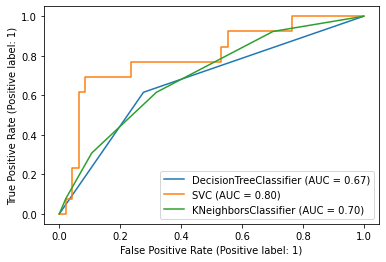

In [44]:
# plot ROC curve of classifier performance on test set
# these curves show the tradeoff between true positive rate and false positive rate as you adjust the probability threshold 
# (predicted liklihood of death) required for each model to actually predict that the patient will die
fig, ax = plt.subplots() 
sklearn.metrics.RocCurveDisplay.from_estimator(dtree, X_test, y_test, ax=ax)
sklearn.metrics.RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=ax)
sklearn.metrics.RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax)

So this performance is...not great (recall what the ideal ROC curve should look like). To answer why, we should start by visualizing the data to see how well the features separate the `death` and `no death` classes. You'll be trying this yourself in Part 3!

Another way we can explore the classification results is by plotting a *confusion matrix* showing us how the classifiers are making mistakes or "confusing" examples to be in classes that they are not. Confusion matrices are usually less interesting for binary classification problems, but let's create one for the SVC classifier by using the `plot_confusion matrix()` function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

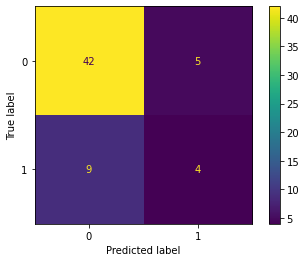

In [45]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

Interesting! So for refererence, the `0` class means that the patient did *not* die, while the `1` class means that the patient *did* die. 

**QUESTION 2.1:** What does this confusion matrix tell us about the SVC classifier we have trained?

## Part 3. Try It Yourself

Now you will try creating your own visualizations of data and metrics. 

### 3.1 Visualizing Heart Failure Data

In a separate  `DataVisualization.py` file, write a program that loads the heart failure dataset (`heart_failure_clinical_records_dataset.csv`) and creates **all** of the three following visualizations:
* A pair plot showing pairwise relationships between features (like the Iris version above)
* A 2D scatterplot showing the relationship between examples after PCA projection into 2D (like the Iris version above)
* A different plot of your choice that you believe provides some useful intuition about the data. You can generate this figure using either the Matplotlib or Seaborn libraries, so you will need to read the documentation to see what other plotting functions exist and how to use them. 

Be sure to save these plots as `Pairplot.pdf`, `PCAplot.pdf`, and `Otherplot.pdf` for submission.


### 3.2 Visualizing Iris classifier performance
In a separate `MetricsVisualization.py` file, write a program that loads the Iris data and trains a *5-nearest neighbors classifier* (see code above) to predict the species of an Iris from petal and sepal measurements. At the end, plot a *confusion matrix* based on the test set and save it as `CM.pdf`.

### 3.3 Open-ended Questions
Answer all questions in Section 3 of `Lab2-Questions.txt`

## Deliverables

As a reminder, you need to submit the following files to Gradescope:
* DataVisualization.py
* Pairplot.pdf 
* PCAplot.pdf
* Otherplot.pdf
* MetricsVisualization.py
* CM.pdf
* Lab2-Questions.txt

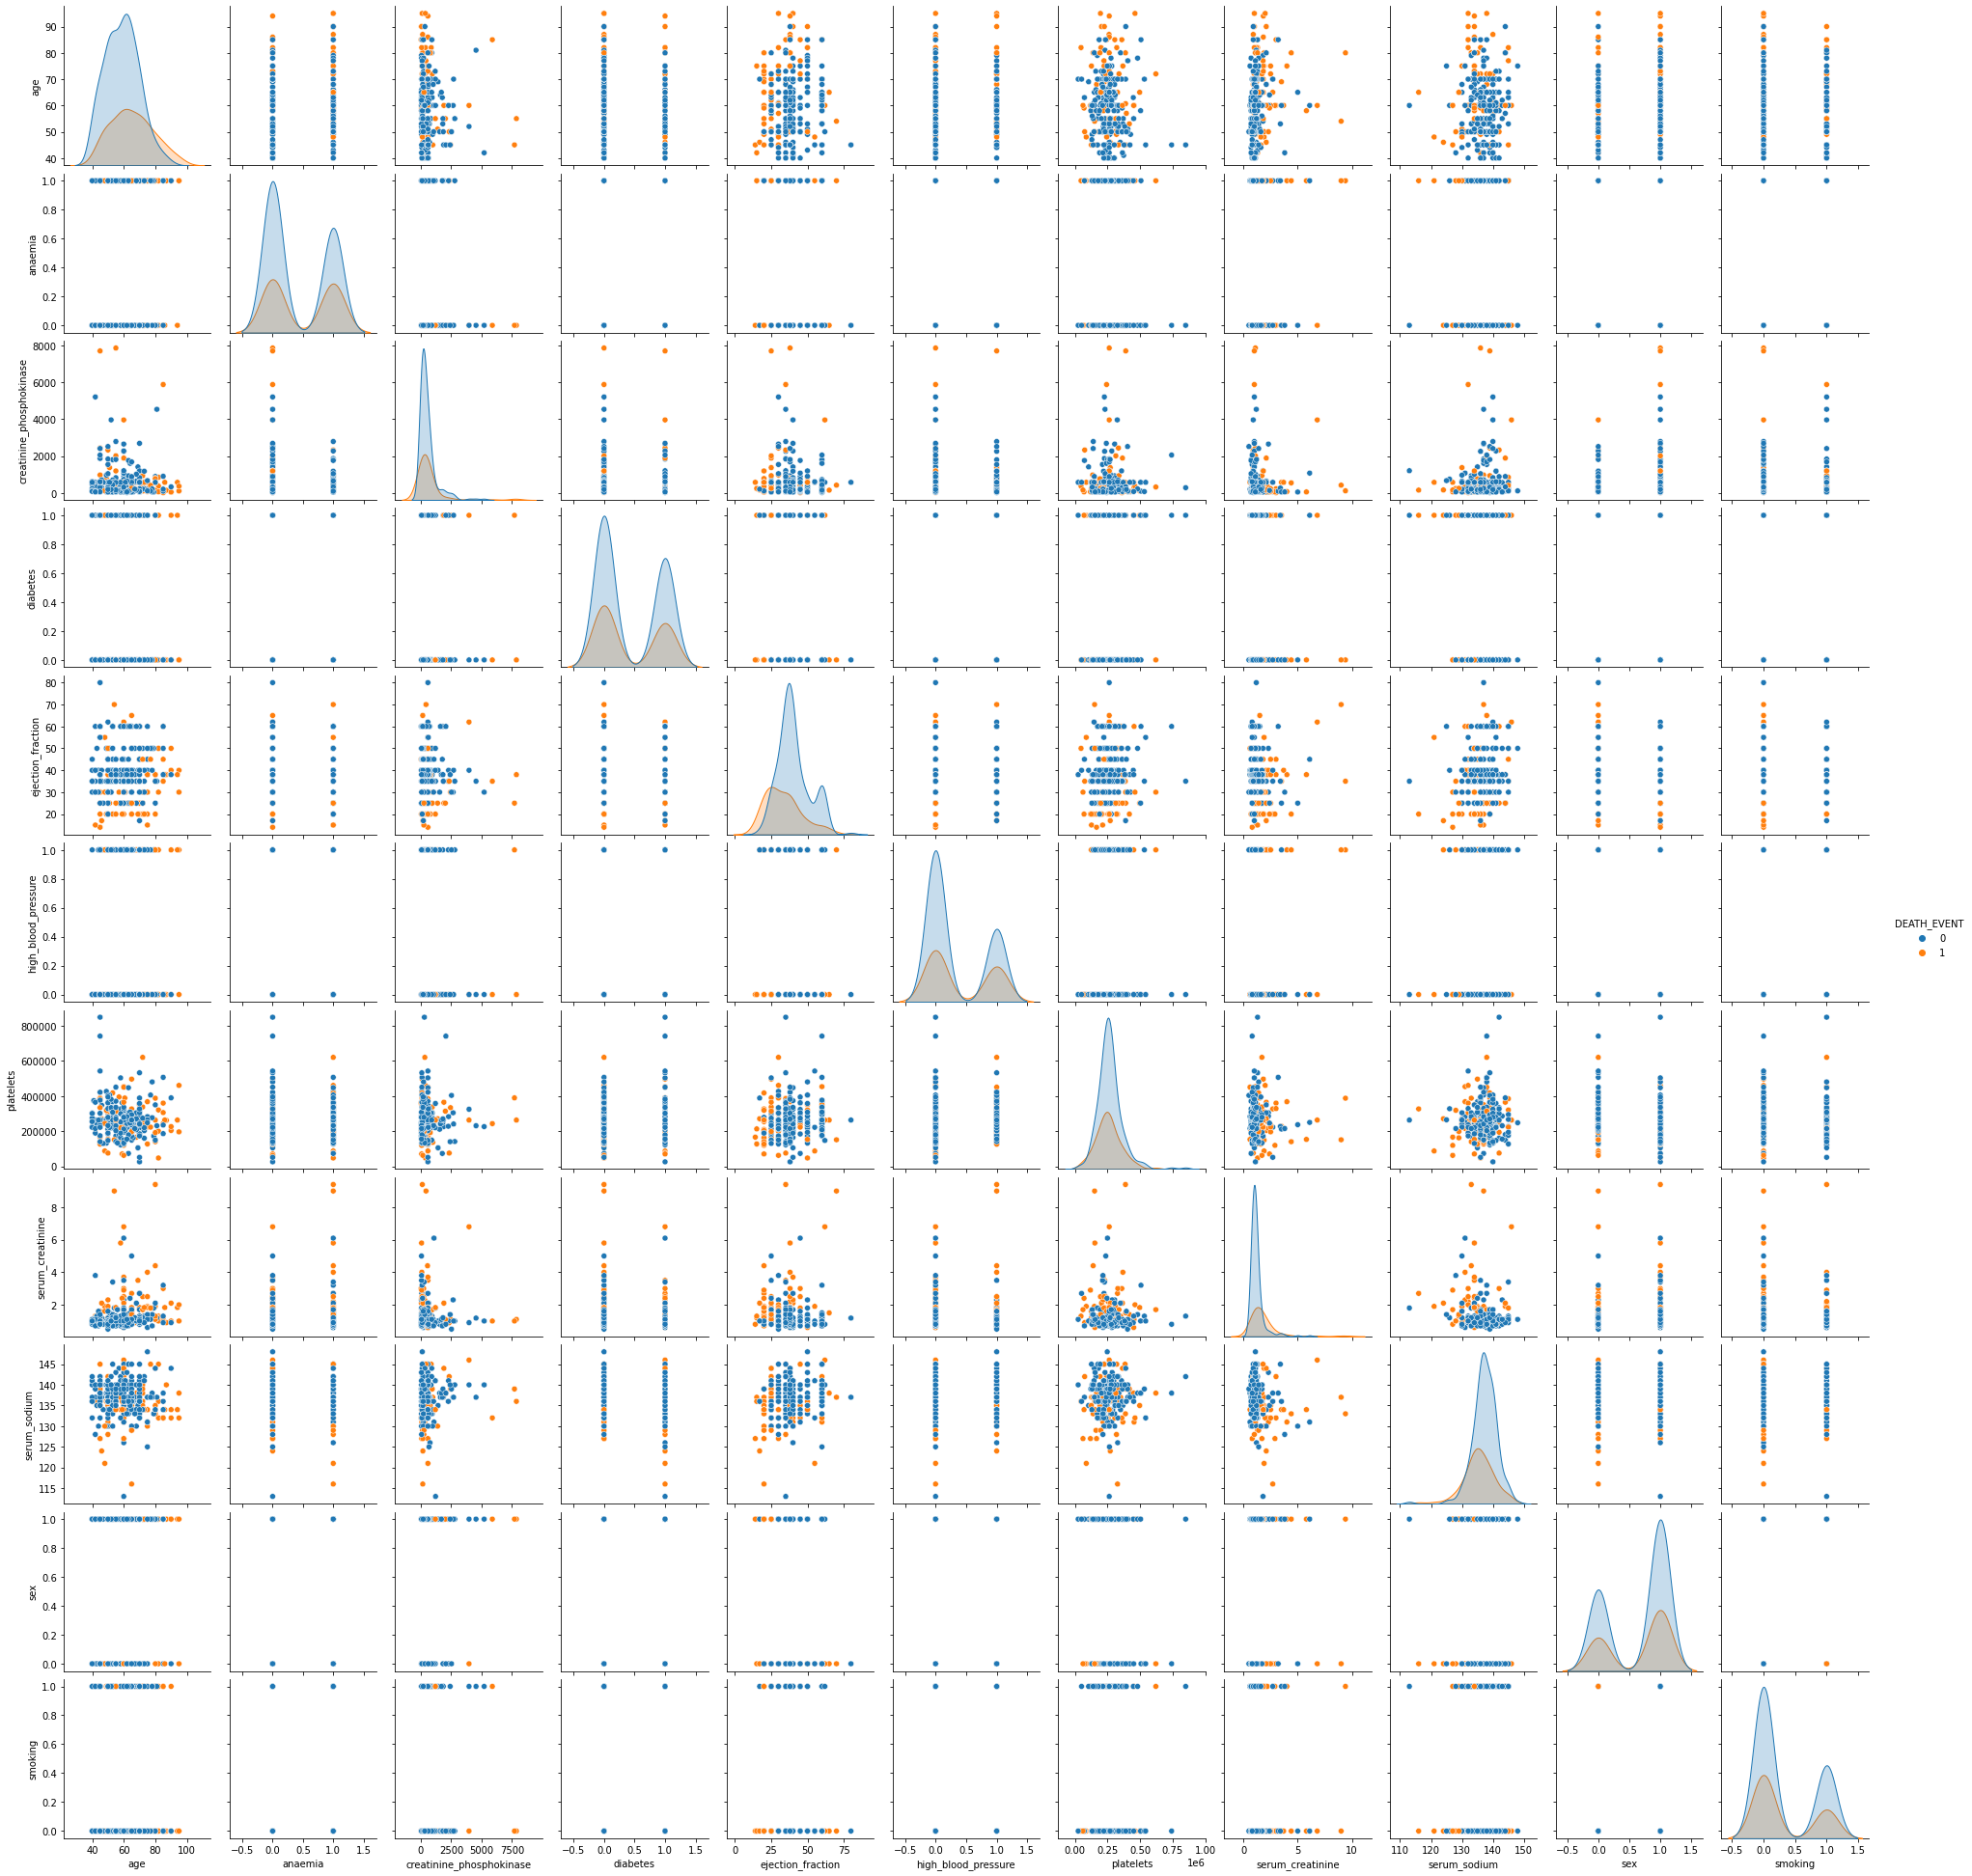

In [7]:
X = pd.read_csv("heart_failure_clinical_records_dataset.csv")

sns.pairplot(data=X, hue="DEATH_EVENT")

